# Lab 1: Deep Neural Network (DNN)

# 1.1 Keras basics
<img src="https://drive.google.com/uc?id=1qUd5pI-C3DOFbJs8tGos9OCKZmPnNZYB" width="400px"><br>
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.<br>
It allows for easy and fast prototyping and supports both convolutional networks and recurrent networks.<br>
Its most important features are: user friendliness, modularity, easy extensibility

In this section we will:
* 1.1.1 Build a Single Layer Perceptron
* 1.1.2 Build a Multilayer perceptron

## 1.1.1 Build a Single Layer Perceptron
#### Build a Single Layer Perceptron in Tensorflow
Let's build a single layer perceptron composed by one dense layer.<br>
<img src="https://drive.google.com/uc?id=1cvJa9WfOier2NQIJGHpqDNGn-RlczU1x" width="500px"><br>

In [1]:
import tensorflow as tf
def one_dense_layer(x, n_in, n_out):
    # n_in: number of inputs, n_out: number of outputs
    # y = sigmoid(W*x + b)
    # W = [1,1]
    # b = 1
    W = tf.ones((n_in, n_out))
    b = tf.ones((1, n_out))
    z = tf.matmul(x,W) + b
    out = tf.sigmoid(z)
    return out

In [2]:
x_input = tf.constant([[1,2.]], shape=(1,2))

res = one_dense_layer(x_input, n_in=2, n_out=2)
print(res)

tf.Tensor([[0.98201376 0.98201376]], shape=(1, 2), dtype=float32)


#### Build the same Single Layer Perceptron with Keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 2

# First define the model 
model = Sequential() # model lets us define a linear stack of network layers.

# define our single fully connected network layer
dense_layer = Dense(n_output_nodes, activation='sigmoid',kernel_initializer="Ones",bias_initializer="Ones")
# Add the dense layer to the model
model.add(dense_layer)

## 1.1.2 Build a Multilayer perceptron
Let's build a multilayer perceptron; MLPs are fully connected, each node in one layer connects with a certain weight to every node in the following layer.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/ANN-Graph.gif" width="400px"><br>

Try to build one composed by two hidden dense layer with ReLU activation and one dense output layer(units=1) with sigmoid activation.

### <font color="blueviolet">Comment and Analysis: <font color="navy"> In this part I try to figure out what is the effect of increasing the number of units(neurons) on the test and train accuracy. 
 ### <font color="navy">So I start from only 32 units in each layer and add double that of the previous units for the next step choosing units = 32, 64, 128, 256, 512 for each of these three layers.
    

In [4]:
import numpy as np
from tensorflow.keras.layers import Dense
# Generate dummy data
train_data = np.random.random((1000, 100))
train_labels = np.random.randint(2, size=(1000, 1))
test_data = np.random.random((100, 100))
test_labels = np.random.randint(2, size=(100, 1))

# Build your first model by creating a Sequential object and then adding 3 Dense layers:
units = 32
# Create a Sequential
model = Sequential()
# Add a Dense layer with 32 neurons, with relu as activation function and input dimension equal to the number of features
model.add(tf.keras.Input(shape=(100,)))
model.add(tf.keras.layers.Dense(units, activation='relu'))
# Add a Dense layer with 32 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(units, activation='relu'))
# To produce the output Add a Dense layer with 1 neurons, with sigmoid as activation function
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [5]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
# The fit function output is a History object. The history.history attribute is a record of
# training loss values and metrics values at successive epochs, as well as validation loss values 
# and validation metrics values 
history = model.fit(train_data, train_labels, epochs=30, batch_size=32)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
32/32 [==============================] - 1s 1ms/step - loss: 0.6998 - accuracy: 0.5020
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5110
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5370
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5740
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5490
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5660
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5760
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.5960
Epoch 9/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.6020
Epoch 10/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.6220
Epoch 11/30
32/32 [

In [6]:
units = 64
# Create a Sequential
model = Sequential()
# Add a Dense layer with 32 neurons, with relu as activation function and input dimension equal to the number of features
model.add(tf.keras.Input(shape=(100,)))
model.add(tf.keras.layers.Dense(units, activation='relu'))
# Add a Dense layer with 32 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(units, activation='relu'))
# To produce the output Add a Dense layer with 1 neurons, with sigmoid as activation function
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [7]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
# The fit function output is a History object. The history.history attribute is a record of
# training loss values and metrics values at successive epochs, as well as validation loss values 
# and validation metrics values 
history = model.fit(train_data, train_labels, epochs=30, batch_size=32)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
32/32 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.4810
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5270
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5660
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5930
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5950
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.6130
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6180
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6458 - accuracy: 0.6240
Epoch 9/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6380
Epoch 10/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.6710
Epoch 11/30
32/32 [

In [8]:
units = 128
# Create a Sequential
model = Sequential()
# Add a Dense layer with 32 neurons, with relu as activation function and input dimension equal to the number of features
model.add(tf.keras.Input(shape=(100,)))
model.add(tf.keras.layers.Dense(units, activation='relu'))
# Add a Dense layer with 32 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(units, activation='relu'))
# To produce the output Add a Dense layer with 1 neurons, with sigmoid as activation function
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
# The fit function output is a History object. The history.history attribute is a record of
# training loss values and metrics values at successive epochs, as well as validation loss values 
# and validation metrics values 
history = model.fit(train_data, train_labels, epochs=30, batch_size=32)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
32/32 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.4880
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5420
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5710
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.5850
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.6230
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6050
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.6470
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.6570
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.6670
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.6770
Epoch 11/30
32/32 [

In [10]:
units = 256
# Create a Sequential
model = Sequential()
# Add a Dense layer with 32 neurons, with relu as activation function and input dimension equal to the number of features
model.add(tf.keras.Input(shape=(100,)))
model.add(tf.keras.layers.Dense(units, activation='relu'))
# Add a Dense layer with 32 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(units, activation='relu'))
# To produce the output Add a Dense layer with 1 neurons, with sigmoid as activation function
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [11]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
# The fit function output is a History object. The history.history attribute is a record of
# training loss values and metrics values at successive epochs, as well as validation loss values 
# and validation metrics values 
history = model.fit(train_data, train_labels, epochs=30, batch_size=32)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.4850
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5350
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5680
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6080
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.6440
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6470
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7090
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.7060
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7200
Epoch 10/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7680
Epoch 11/30
32/32 [

In [12]:
units = 512
# Create a Sequential
model = Sequential()
# Add a Dense layer with 32 neurons, with relu as activation function and input dimension equal to the number of features
model.add(tf.keras.Input(shape=(100,)))
model.add(tf.keras.layers.Dense(units, activation='relu'))
# Add a Dense layer with 32 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(units, activation='relu'))
# To produce the output Add a Dense layer with 1 neurons, with sigmoid as activation function
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
# The fit function output is a History object. The history.history attribute is a record of
# training loss values and metrics values at successive epochs, as well as validation loss values 
# and validation metrics values 
history = model.fit(train_data, train_labels, epochs=30, batch_size=32)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
32/32 [==============================] - 1s 7ms/step - loss: 0.7355 - accuracy: 0.5010
Epoch 2/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.5500
Epoch 3/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6784 - accuracy: 0.5750
Epoch 4/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6528 - accuracy: 0.6220
Epoch 5/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6374 - accuracy: 0.6430
Epoch 6/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6230 - accuracy: 0.6670
Epoch 7/30
32/32 [==============================] - 0s 8ms/step - loss: 0.5907 - accuracy: 0.6860
Epoch 8/30
32/32 [==============================] - 0s 10ms/step - loss: 0.5535 - accuracy: 0.7200
Epoch 9/30
32/32 [==============================] - 0s 9ms/step - loss: 0.5191 - accuracy: 0.7530
Epoch 10/30
32/32 [==============================] - 0s 7ms/step - loss: 0.4726 - accuracy: 0.7910
Epoch 11/30
32/32 

 ###  <font color="blueviolet">Comments and Analysis: <font color="navy"> The below table indicates the results that we obtained when units increase in number:
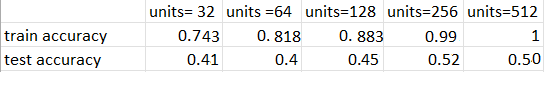

### <font color="navy"> This indicates that as we increase the number of neurons in each layer, we will have a more complicated model and as a result our model perform better and better in terms of learning part( train accuracy started from 0.743 and ended  up with 100% accuracy) but if we look at test accuracy which is the most important factor to evaluate a model, it can be seen that it started from 0.41 and went up to 0.52 when we had 256 neurons in each layer but from that step unwards even if train performance got better, the test accuracy decreased so we can say that the model in overfitted in that point. As a result I will continue my analysis using 256 neurons for each layer. The last point is that these results are achieved with epochs=30, batch_size=32 but I will alter these parameters as well to see how they will influence our result and why.

### <font color="navy">In this part I will fill a table which shows what will happen when we change the nubmer of batch size or epoches in our architecture. Note that in each time I only changed the value for one of these parameters to see its effect individually.When the batch size in equal to 1 this mean that we use a pointwise method while if the batch size is equal to the number of data points, this means that we are using classic GD. As for number of epoches, in general too many epochs may cause our model to over-fit the training data. It means that our model does not learn the data, it memorizes the data. We have to find the accuracy of validation data for each epoch or maybe iteration to investigate whether it over-fits or not.

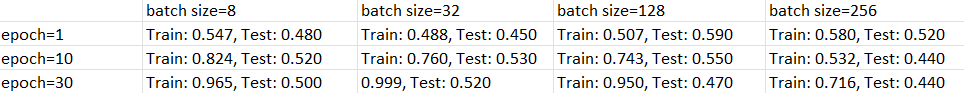

### <font color="navy">This table indicates some points: first of all, as it can be seen when we increase the number of epoches for each batch size, the train accuracy become higher and higher and this was the result that we expect cause when you increase the number of times that model itteratively run on the same data, the architecture learn better and better. On the other hand, test accuracy was the highest when epoch=10 for first two batch sizes(8,32) but for the batch size=128 and 256, the test accuracy was the highst when the number of epoches is equal to one. In my opinion, as we consider a bigger set of data for our evaluation(bigger batch size), our model reach its highst performance earlier for example with just one itteration over the data. but if we consider less batch size, our model need more time to reach its maximum performance. Another point is that, is it can be seen the highst performance amongst all is for batch size=128 and epoches=1 with 0.59 test accuracy.
    

### <font color="navy">Second part of my analysis is about the fact that our data in above case is random data so our best number of epochs , best batch size and even the best size for units may vary from one runtime to another. This also cause a relatively low performance as the data points are random so the relation between them and the accuracy that the network can achieve is much lower than that of a reasonable dataset.

# 1.2 Build a Deep Neural Network 
In this section we will:
*  1.2.1 Import the dataset
*  1.2.2 Build a model
*  1.2.3 Train the model 
*  1.2.4 Evaluate the model

## 1.2.1 Import the Dataset
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. <br>
Each example is a 28×28 grayscale image, associated with a label from 10 classes.<br>
<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--s6xGmaZX--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png" width="600px"><br>


In [4]:
from sklearn.model_selection import train_test_split
mnist_fashion = tf.keras.datasets.fashion_mnist

(x_learn, y_learn),(x_test, y_test) = mnist_fashion.load_data()
x_learn, x_test = x_learn / 255.0, x_test / 255.0 # normalization 
x_train, x_val, y_train, y_val = train_test_split(x_learn, y_learn, test_size=0.3, random_state=42) # split learn in train,val
num_classes = 10 # Fashion-MNIST classes

print(x_train.shape, x_val.shape, x_test.shape)

(42000, 28, 28) (18000, 28, 28) (10000, 28, 28)


#### Plot some sample from the training set

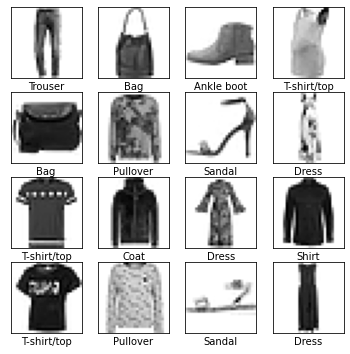

In [5]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 1.2.2 Build a Model

<img src="https://drive.google.com/uc?id=1siIVKXLL7_YsecqlCQqw_ZI35LhR8XbI" width="400px"><br>

A Deep Neural Network is a neural network composed by many layers and consequently it has a deeper structure. The number of layers in the network depends on different factors: for example on the data available, on the complexity of the problem, on the computational power and so on.
The value produced as output by a neuron is determined by the input the neuron receives and by the activation function. There exists different choices for the activation function. One of the most used is Relu but it depends on the data and on the network architecture.
<br><br>
<img src="https://miro.medium.com/max/1400/1*LiBZo_FcnKWqoU7M3GRKbA.png" width="400px"><br>


#### Build a model with this structure: Flatten+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(softmax)

In [6]:
from tensorflow.keras.layers import Flatten
# https://keras.io/layers/core/
model = Sequential()
model.add(Flatten())

# Add a Dense layer with 512 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(512, activation='relu'))
# Add a Dense layer with 256 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(256, activation='relu'))
# Add a Dense layer with 128 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Add a Dense layer with 64 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(64, activation='relu'))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

When we are building a model there are many design choises that we must operate: the choice of a Loss Function, the Metrics and the Optimizer.<br>

**Loss functions** are used to compare the network's predicted output  with the real output, in each pass of the backpropagations algorithm<br>
Common loss functions are: mean-squared error, cross-entropy, and so on...<br><br>
**Metrics** are used to evaluate a model; common metrics are precision, recall, accuracy, auc,..<br>

The **Optimizer** determines the update rules of the weights. The performance and update speed may heavily vary from optimizer to optimizer; in choosing an optimizer what's important to consider is the network depth, the type of layers and the type of data.<br>
The gif below give an idea on how different Optimizers work.<br>

<img src="https://user-images.githubusercontent.com/11681225/49325458-fc785480-f585-11e8-8d2a-9012d6024c6e.gif" width="460px">

#### Configures the model for training

In [7]:
# Optimizers    https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = Adagrad(lr=0.01,epsilon=None,decay=0.0)
adamax = Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

# Losses    https://keras.io/losses/
loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

# Metrics    https://www.tensorflow.org/api_docs/python/tf/metrics
metrics = ['accuracy','precision','recall']

C:\Users\Pishro System\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Pishro System\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
C:\Users\Pishro System\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)
C:\Users\Pishro System\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)
C:\Users\Pishro System\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\adama

In [8]:
# Compile the model you created before using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
             loss=loss[0],
             metrics=metrics[0])

## 1.2.3 Train the model 
The batch size is a number of samples processed before the model is updated.<br>
The number of epochs is the number of complete passes through the training dataset.

### <font color="blueviolet">Comment and Analysis: <font color="navy"> Again in this part, I will change the batch size as well as number of epochs in order to make some analysis due to the obtained results. Also I will make some comparison according to the epochs-error plot that will be shown below:

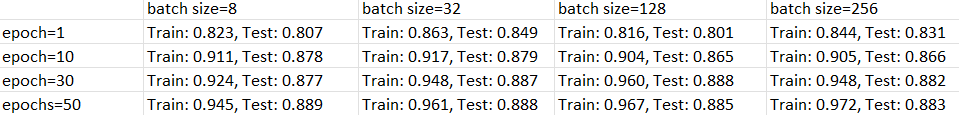

### <font color="navy"> As it can be seen when we increase the number of epochs, the train accuracy will increase for all batch sizes. In addition for test accuracy, when we increase the number of epochs, the test accuracy first increase and then become constant from one point onwards. I predict that if we continue to increasing the epochs, the test accuracy will start to reduce due to the overfitting issue. So we will need a mechanizim to stop our model from growing in one point and this is what we will be introduced below as early stopping option.

### <font color="navy">On the other hand, if we analyse our table with constant epoch number but various batch size, we will see that a moderate number of batches and epoch will give us the best accuracy rate (for example batch size=32 and epochs=10).  As another clarifying example, if we have 8 betch size , as we increase the number of epochs our train accuracy increase while test accuracy remained almost constant.

In [16]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)

Epoch 1/10
329/329 [==============================] - 3s 8ms/step - loss: 0.2632 - accuracy: 0.9020 - val_loss: 0.3142 - val_accuracy: 0.8877
Epoch 2/10
329/329 [==============================] - 3s 8ms/step - loss: 0.2561 - accuracy: 0.9030 - val_loss: 0.3373 - val_accuracy: 0.8826
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.2492 - accuracy: 0.9060 - val_loss: 0.3191 - val_accuracy: 0.8852
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 0.2375 - accuracy: 0.9103 - val_loss: 0.3267 - val_accuracy: 0.8862
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.2249 - accuracy: 0.9150 - val_loss: 0.3283 - val_accuracy: 0.8875
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 0.2168 - accuracy: 0.9172 - val_loss: 0.3135 - val_accuracy: 0.8906
Epoch 7/10
329/329 [==============================] - 2s 7ms/step - loss: 0.2089 - accuracy: 0.9200 - val_loss: 0.3180 - val_accuracy: 0.8871
Epoch 

In [13]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

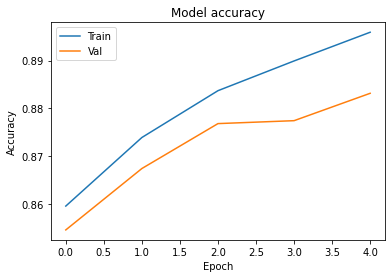

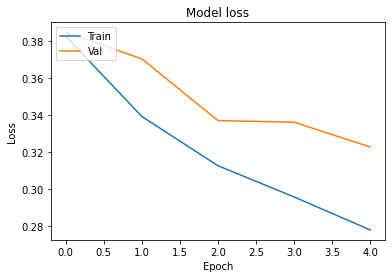

In [14]:
plot_history(history)

### <font color="blueviolet">Comment and Analysis: <font color="navy"> Below I will show three example of plots with different epochs in order to analyse the changes. As for the plots with same number of epochs and different batch sizes, the overall trend of plots are almost the same exept some slight differences which I think cannot be that much important in the general result and analysis. So we will take a look at how changing number of epochs will affect our plot trend.

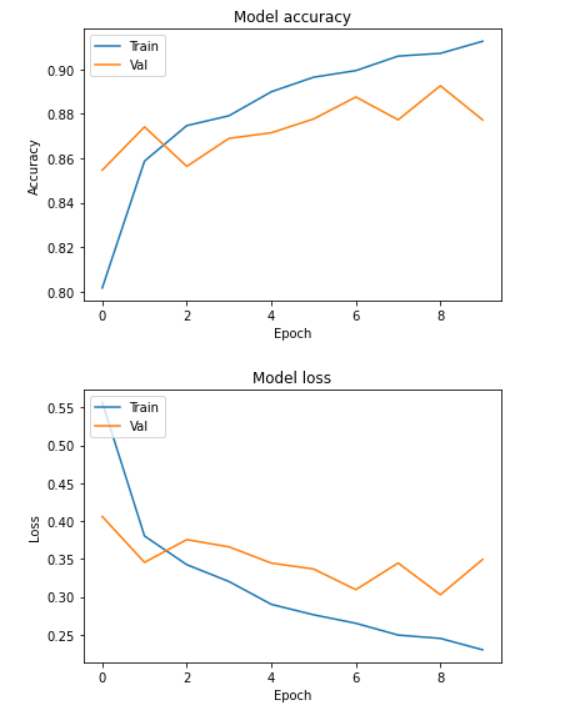
### <center><font color="Navy">epoch=10 , batch size=128


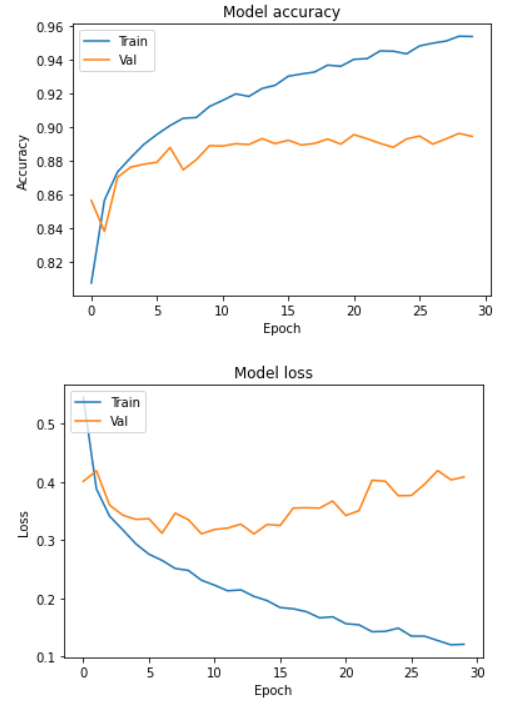
### <center><font color="Navy"> epoch=30 ,batch size=128

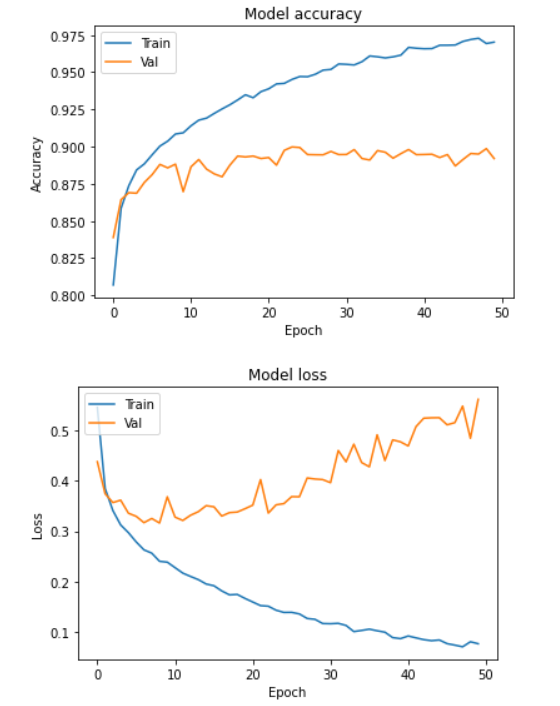
### <center><font color="Navy"> epoch=50 ,batch size=128

**What could you notice in the loss graph training the model over large number of epochs?**

### <font color="navy">What I can see is that in the model loss plot train loss is almost the same for all epoch numbers while for validation loss it is evident that when we increase the number of epochs the validation loss starts from nearly 0.4 but end up in hugher values in the plots with greater number of epochs. This may mean that for higher number of epochs, our model will face with greater amount of loss in the validation set so this indicates that if we increase the epochs to very high numbers, our model will face a overfitting situation.

## 1.2.4 Evaluate the model


In [15]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8798
Train: 0.905, Test: 0.880


**Try to play with these parameters (loss and optimizers) in order to see how this choice affects the accuracy. What do you expect? which is faster?**


# 1.3 Overfitting
Given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.<br>
A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether).<br>
How to improve generalization of our model on unseen data?<br>
In this section we will:
* 1.3.1 Add weight regularization
* 1.3.2 Dropout
* 1.3.3 Early stopping

## 1.3.1 Add weight regularization
A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".<br>
This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.<br> This cost comes in two flavors:
* L1 regularization
* L2 regularization

In tf.keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

Epoch 1/10
329/329 [==============================] - 5s 13ms/step - loss: 0.9436 - accuracy: 0.7793 - val_loss: 0.6355 - val_accuracy: 0.8459
Epoch 2/10
329/329 [==============================] - 4s 12ms/step - loss: 0.5978 - accuracy: 0.8438 - val_loss: 0.5811 - val_accuracy: 0.8463
Epoch 3/10
329/329 [==============================] - 4s 12ms/step - loss: 0.5359 - accuracy: 0.8563 - val_loss: 0.5600 - val_accuracy: 0.8455
Epoch 4/10
329/329 [==============================] - 4s 13ms/step - loss: 0.5093 - accuracy: 0.8606 - val_loss: 0.4997 - val_accuracy: 0.8633
Epoch 5/10
329/329 [==============================] - 4s 13ms/step - loss: 0.4824 - accuracy: 0.8677 - val_loss: 0.5071 - val_accuracy: 0.8597
Epoch 6/10
329/329 [==============================] - 4s 12ms/step - loss: 0.4652 - accuracy: 0.8715 - val_loss: 0.5054 - val_accuracy: 0.8508
Epoch 7/10
329/329 [==============================] - 4s 12ms/step - loss: 0.4516 - accuracy: 0.8755 - val_loss: 0.4920 - val_accuracy: 0.8625

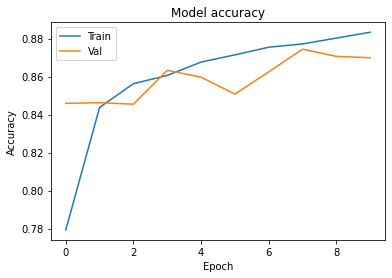

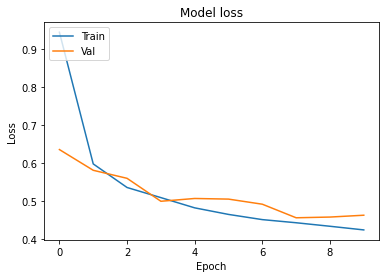

313/313 [==============================] - 1s 3ms/step - loss: 0.4913 - accuracy: 0.8571
Train: 0.883, Test: 0.857


In [20]:
from  tensorflow.keras import regularizers
# Build the model
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# Add a Dense layer with 256 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer
model.add(tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# Add a Dense layer with 128 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer
model.add(tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# Add a Dense layer with 64 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model you just created using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
             loss=loss[0],
             metrics=metrics[0])

# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)
# Call the plot_history function to plot the obtained results
plot_history(history)
# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

## 1.3.2 Dropout
Dropout is one of the most effective and most commonly used regularization techniques for neural networks.<br>
Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.<br>
<img src="https://drive.google.com/uc?id=1PcGnn9cdM5JQk2nxRHAFPZAtBj1fNMvk" width="600px"><br>

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5; at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

Epoch 1/10
329/329 [==============================] - 4s 10ms/step - loss: 0.6972 - accuracy: 0.7419 - val_loss: 0.4638 - val_accuracy: 0.8317
Epoch 2/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4749 - accuracy: 0.8290 - val_loss: 0.3977 - val_accuracy: 0.8559
Epoch 3/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4276 - accuracy: 0.8475 - val_loss: 0.3805 - val_accuracy: 0.8623
Epoch 4/10
329/329 [==============================] - 3s 10ms/step - loss: 0.3996 - accuracy: 0.8563 - val_loss: 0.3775 - val_accuracy: 0.8605
Epoch 5/10
329/329 [==============================] - 3s 9ms/step - loss: 0.3828 - accuracy: 0.8623 - val_loss: 0.3536 - val_accuracy: 0.8718
Epoch 6/10
329/329 [==============================] - 3s 9ms/step - loss: 0.3684 - accuracy: 0.8658 - val_loss: 0.3575 - val_accuracy: 0.8720
Epoch 7/10
329/329 [==============================] - 3s 9ms/step - loss: 0.3555 - accuracy: 0.8702 - val_loss: 0.3449 - val_accuracy: 0.8735
Epoc

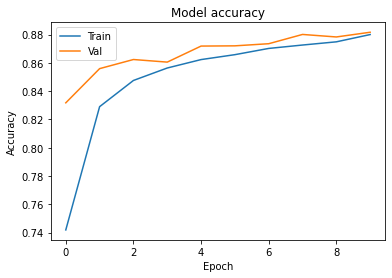

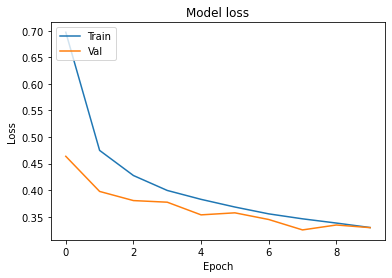

313/313 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8728
Train: 0.899, Test: 0.873


In [21]:
from tensorflow.keras.layers import Dropout
# Build the model
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(512, activation='relu'))
# Add a Dropout layer with 0.3 drop probability
model.add(Dropout(0.3))
# Add a Dense layer with 256 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(256, activation='relu'))
# Add a Dropout layer with 0.3 drop probability
model.add(Dropout(0.3))
# Add a Dense layer with 128 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Add a Dropout layer with 0.3 drop probability
model.add(Dropout(0.3))
# Add a Dense layer with 64 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(64, activation='relu'))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model you just created using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
             loss=loss[0],
             metrics=metrics[0])


# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)
# Call the plot_history function to plot the obtained results
plot_history(history)
# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

## 1.3.3 Early stopping
Validation can be used to detect when overfitting starts during supervised training of a neural network; training is then stopped before convergence to avoid the overfitting.<br>

<img src="https://drive.google.com/uc?id=1prBt0w2oWIviRDjOSRKP2TglDGUr-EGZ" width="400px"><br><br>



In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
# early stopping https://keras.io/callbacks/
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Create checkpoint callback that will save the best model observed during training for later use
checkpoint_path = "output/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(checkpoint_path,monitor='val_loss',save_weights_only=True,verbose=1)

Epoch 1/10
329/329 [==============================] - 3s 8ms/step - loss: 0.5584 - accuracy: 0.7962 - val_loss: 0.4140 - val_accuracy: 0.8492
Epoch 2/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3712 - accuracy: 0.8634 - val_loss: 0.3952 - val_accuracy: 0.8538
Epoch 3/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3269 - accuracy: 0.8787 - val_loss: 0.3356 - val_accuracy: 0.8806
Epoch 4/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3049 - accuracy: 0.8863 - val_loss: 0.3264 - val_accuracy: 0.8818
Epoch 5/10
329/329 [==============================] - 3s 8ms/step - loss: 0.2862 - accuracy: 0.8924 - val_loss: 0.3283 - val_accuracy: 0.8810
Epoch 6/10
329/329 [==============================] - 3s 8ms/step - loss: 0.2708 - accuracy: 0.8997 - val_loss: 0.3236 - val_accuracy: 0.8810
Epoch 7/10
329/329 [==============================] - 3s 8ms/step - loss: 0.2574 - accuracy: 0.9037 - val_loss: 0.3393 - val_accuracy: 0.8762
Epoch 

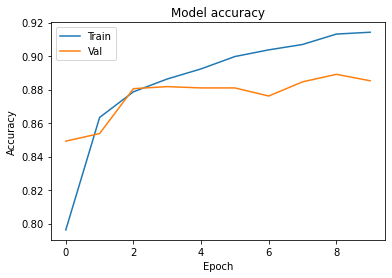

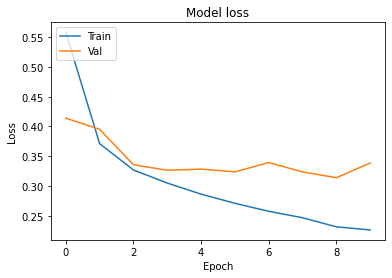

313/313 [==============================] - 1s 2ms/step - loss: 0.3598 - accuracy: 0.8772
Train: 0.914, Test: 0.877


In [23]:
# Build the model
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(512, activation='relu'))
# Add a Dense layer with 256 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(256, activation='relu'))
# Add a Dense layer with 128 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Add a Dense layer with 64 neurons, with relu as activation function
model.add(tf.keras.layers.Dense(64, activation='relu'))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


# Compile the model you just created using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
             loss=loss[0],
             metrics=metrics[0])


# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
# Be careful to also set properly the callbacks parameter list
batch_size =128
epochs = 10
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)
# Call the plot_history function to plot the obtained results
plot_history(history)
# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### <font color="blueviolet">Comment and Analysis: <font color="navy"> In this final part I want to compare the performance of these three methods to avoid overfitting, using their plots:

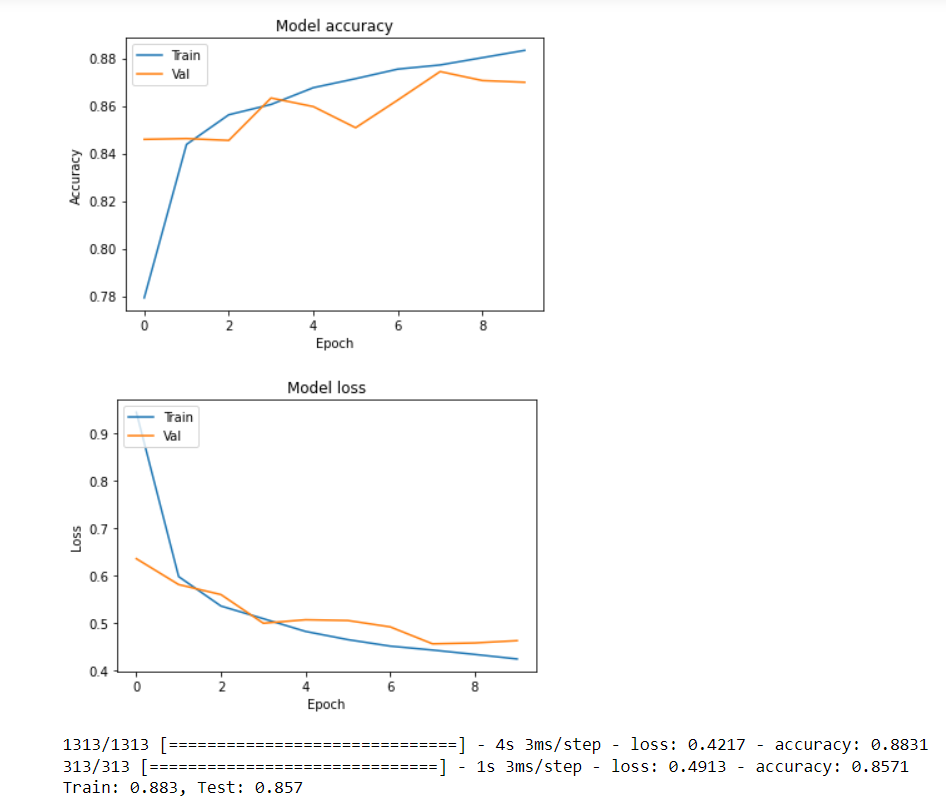
### <center><font color="Navy">Regularization

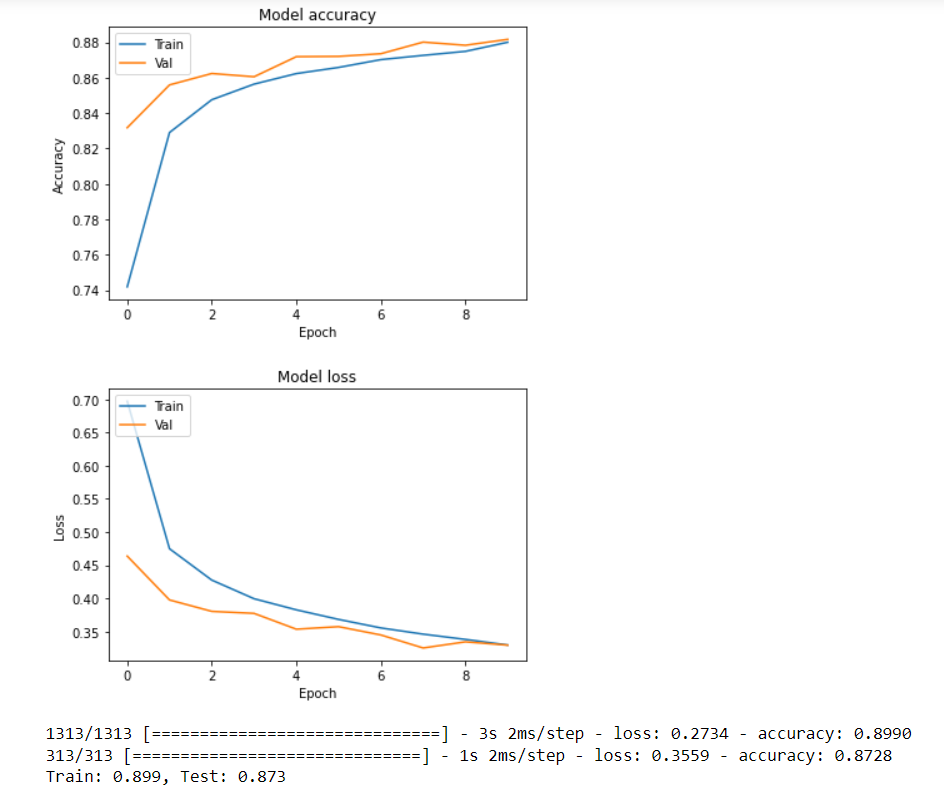
### <center><font color="Navy">Dropout

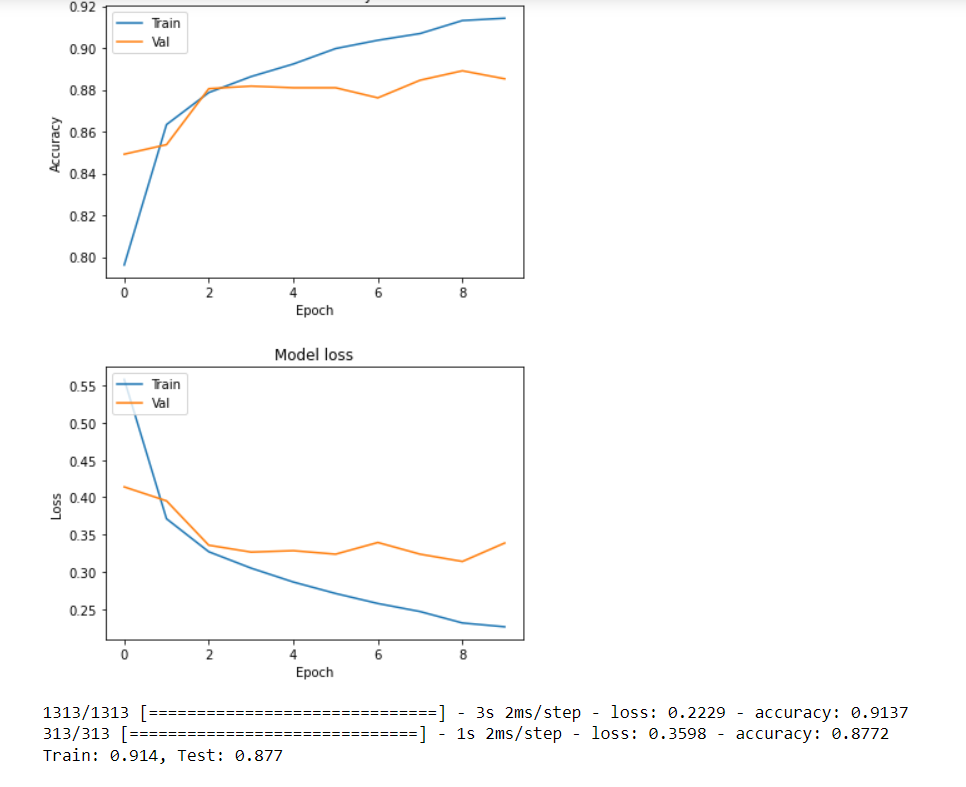
### <center><font color="Navy">Early Stopping

### <font color="navy">First of all from comparing the test and train accuracy results, we can see that with this number of epochs and batch size( apochs=10, batch size= 128) the train accuracy is the best amongst all in the early stopping method. On the other hand comparing the test accuracy which is more important shows that regularization has a lower test accuracy (85% nearly) while other to reaches almost 87% in terms of testing accuracy. All in all in terms of accuracy I believe that Early Stopping is the best method amongst all.

### <font color="navy"> Second point is comparing the train and validation accuracy. What I can understand from the accuracy plots is that in the dropout method, validation accuracy was always above the train accuracy but in other two methods, validation accuracy is mostly below train accuracy. Also the pattern of changes in the dropout method is more slight in comparison with Early Stopping and Regularization.

### <font color="navy">The last point is the analysis of loss plots for these methods. The train loss of Early stopping method was the least from the beginning and it ended up also on the lowest amount amongst all( starting from nearly 0.55 and end up in approximately 0.25 when epochs=10). For validation loss the performance of Early stopping and Dropouts are almost close while the validation loss is higher in the Regularization method in both first and last epoch.

#### Load weights
The saved weights can then be loaded and evaluated any time by calling the load_weights() function.


In [ ]:
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.
# link https://www.tensorflow.org/tutorials/keras/save_and_restore_models

checkpoint_path = "output/cp.ckpt"

model.load_weights(checkpoint_path)

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))